# Parse Theta

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

# Read the data

In [ ]:
import re

# Step 1: Read the full content from the file
with open("raw/theta/theta3-15.m", "r") as f:
    raw = f.read()

# Step 2: Remove outer braces and strip
raw = raw.strip()
if raw.startswith("{") and raw.endswith("}"):
    raw = raw[1:-1]

# Step 3: Use regex to find each Knot[...] -> {...} pair
pattern = re.compile(r"(Knot\[.*?\])\s*->\s*\{(.*?),(.*?)\}", re.DOTALL)
matches = pattern.findall(raw)

# Step 4: Build the list of dictionaries
results = []
for knot_id, alex_expr, theta_expr in matches:
    results.append(
        {
            "id": knot_id.strip(),
            "alexander": alex_expr.strip(),
            "theta": theta_expr.strip(),
        }
    )

print(len(results))

In [ ]:
data_df = pd.DataFrame(results)
data_df

# Extract coefficient vectors

In [ ]:
import cypari2

pari = cypari2.Pari()


def min_max_degree(list_of_poly, variables=["q", "t"]):
    min_max = {}
    for v in variables:
        min_max[v] = {}
        min_max[v]["max"] = -1000
        min_max[v]["min"] = +1000

    for poly in tqdm(list_of_poly):

        pari_poly = pari(poly)
        if pari_poly is None or pari_poly == 0:
            continue

        for v in variables:
            # max degree
            degree = pari.poldegree(pari_poly, v)
            if degree > min_max[v]["max"]:
                min_max[v]["max"] = degree

            # min degree
            # convert v to 1/v and get the max degree
            pari_poly = pari.subst(pari_poly, v, "1/{}".format(v))
            neg_degree = -1 * pari.poldegree(pari_poly, v)
            if neg_degree < min_max[v]["min"]:
                min_max[v]["min"] = neg_degree

    return min_max


def create_coeff_vector(poly, min_q, max_q, min_t, max_t):
    off_q = -min_q
    off_t = -min_t

    coeff = np.zeros(
        (len(range(min_q, max_q + 1)), len(range(min_t, max_t + 1))), dtype=int
    )

    pari_poly = pari(poly)

    if pari_poly is not None or pari_poly != 0:
        for idx_q in range(min_q, max_q + 1):
            for idx_t in range(min_t, max_t + 1):
                coeff[idx_q + off_q, idx_t + off_t] = pari.polcoef(
                    pari.polcoef(pari_poly, idx_t, "T1"), idx_q, "T2"
                )

    return coeff.reshape(-1)


def create_colnames(min_q, max_q, min_t, max_t):
    colnames = []
    for idx_q in range(min_q, max_q + 1):
        for idx_t in range(min_t, max_t + 1):
            colnames.append("T1{}_T2{}".format(idx_q, idx_t))
    return colnames

## theta

In [3]:
theta_degree = min_max_degree(data_df.theta.to_list(), variables=["T1", "T2"])

NameError: name 'min_max_degree' is not defined

In [4]:
theta_degree

NameError: name 'theta_degree' is not defined

In [ ]:
theta_coeff = [
    create_coeff_vector(p, -14, 14, -14, 14) for p in tqdm(data_df.theta.to_list())
]

In [ ]:
theta_df = pd.DataFrame(
    data=theta_coeff,
    columns=np.array(create_colnames(-14, 14, -14, 14)),
)

In [ ]:
theta_df

In [ ]:
theta_df.to_csv("../data/theta/theta_3_15.csv", index=False)

In [ ]:
theta_df = pd.read_csv("../data/theta/theta_3_15.csv")
theta_df.index += 1
theta_df.loc[0] = np.zeros(len(theta_df.columns), dtype=int)
theta_df.sort_index(inplace=True)
theta_df

,T1-14_T2-14,T1-14_T2-13,T1-14_T2-12,T1-14_T2-11,T1-14_T2-10,T1-14_T2-9,T1-14_T2-8,T1-14_T2-7,T1-14_T2-6,T1-14_T2-5,...,T114_T25,T114_T26,T114_T27,T114_T28,T114_T29,T114_T210,T114_T211,T114_T212,T114_T213,T114_T214
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
theta_df.index = idx
theta_df

In [ ]:
theta_df.iloc[:5].max(axis=1)

In [ ]:
theta_df.iloc[:5].min(axis=1)

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(20, 4))
for i in range(1, 6):
    axs[i - 1].imshow(theta_df.values[i].reshape((29, 29)))
    axs[i - 1].set_title(idx[i])

plt.tight_layout()
plt.savefig("test.png")
plt.show()

In [ ]:
theta_low = theta_df.T.drop_duplicates().T
theta_low

In [ ]:
idx = ["Knot[0,1]"] + data_df.id.tolist()
idx

In [ ]:
theta_low.index = idx
theta_low

In [ ]:
theta_low.to_csv("theta_3_15_LOWDIM.csv")

In [ ]:
theta_df

In [ ]:
import umap

X_umap = umap.UMAP().fit_transform(theta_low.values)

In [ ]:
import seaborn as sns

sns.scatterplot(
    x=X_umap[:, 0],
    y=X_umap[:, 1],
    hue=coloring_df.signature.tolist(),
    palette="tab10",
    s=1,
    alpha=0.8,
)
plt.legend(title="Signature", markerscale=4)

plt.savefig("theta_umap.png", dpi=200)
plt.show()

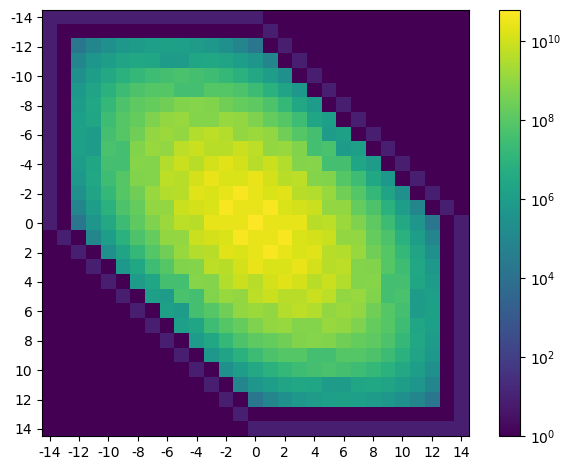

In [ ]:
plt.imshow(np.abs(theta_df).sum().values.reshape((29, 29)) + 1, norm="log")
plt.xticks(range(0, 29, 2), range(-14, 15, 2))
plt.yticks(range(0, 29, 2), range(-14, 15, 2))
plt.colorbar()
plt.tight_layout()
plt.savefig("all_theta.png")
plt.show()

# duplicated

In [5]:
theta_df = pd.read_csv("theta_3_15.csv")
theta_df

,T1-14_T2-14,T1-14_T2-13,T1-14_T2-12,T1-14_T2-11,T1-14_T2-10,T1-14_T2-9,T1-14_T2-8,T1-14_T2-7,T1-14_T2-6,T1-14_T2-5,...,T114_T25,T114_T26,T114_T27,T114_T28,T114_T29,T114_T210,T114_T211,T114_T212,T114_T213,T114_T214
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
theta_low = theta_df.T.drop_duplicates().T
theta_low

,T1-14_T2-14,T1-14_T2-13,T1-14_T21,T1-12_T2-12,T1-12_T2-11,T1-12_T2-10,T1-12_T2-9,T1-12_T2-8,T1-12_T2-7,T1-12_T2-6,...,T1-5_T2-3,T1-4_T2-4,T1-4_T2-3,T1-4_T2-2,T1-3_T2-3,T1-3_T2-2,T1-2_T2-2,T1-2_T2-1,T1-1_T2-1,T10_T20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,-2,2,-2,0,0,-1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-9,13,-6,12
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-3,6,-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313225,0,0,0,0,0,0,0,0,0,0,...,-263,1465,-1883,3217,894,-1509,3636,-1060,-1854,6024
313226,0,0,0,0,0,0,0,0,0,0,...,396,3241,46,859,-4538,-149,10203,-7717,-960,6480
313227,0,0,0,0,0,0,0,0,0,0,...,10807,11963,19645,-37261,-49550,26295,45472,-83834,44012,-91116
313228,0,0,0,0,0,0,0,0,0,0,...,1666,6150,254,534,-7544,-618,17258,-10826,-4652,19608


In [7]:
m = pd.DataFrame((theta_df != 0).any(axis=0).astype(int)).T
m

,T1-14_T2-14,T1-14_T2-13,T1-14_T2-12,T1-14_T2-11,T1-14_T2-10,T1-14_T2-9,T1-14_T2-8,T1-14_T2-7,T1-14_T2-6,T1-14_T2-5,...,T114_T25,T114_T26,T114_T27,T114_T28,T114_T29,T114_T210,T114_T211,T114_T212,T114_T213,T114_T214
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
m.loc[0, theta_low.columns] = 2

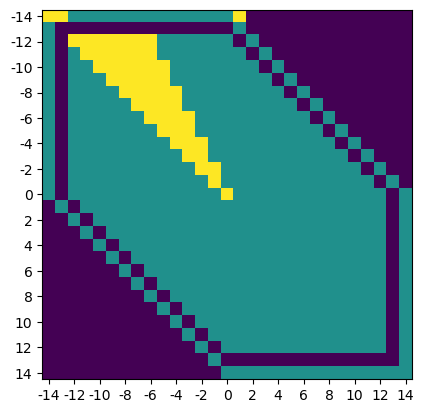

In [9]:
## color this by the size of the orbit

plt.imshow(m.values[0].reshape((29, 29)))
plt.xticks(range(0, 29, 2), range(-14, 15, 2))
plt.yticks(range(0, 29, 2), range(-14, 15, 2))
plt.show()

In [ ]:
# Group identical columns
def group_identical_columns(df):
    groups = []
    seen = set()
    cols = df.columns.tolist()

    for i, col in tqdm(enumerate(cols)):
        if col in seen:
            continue
        if (df[col] == 0).all():
            continue
        group = [col]
        for j in range(i + 1, len(cols)):
            other_col = cols[j]
            if df[col].equals(df[other_col]):
                group.append(other_col)
                seen.add(other_col)
        groups.append(group)
        seen.add(col)

    return groups


identical_groups = group_identical_columns(theta_df)

print("Grouped identical columns:")
for group in identical_groups:
    print(group)

0it [00:00, ?it/s]

Grouped identical columns:
['T1-14_T2-14', 'T1-14_T2-12', 'T1-14_T2-10', 'T1-14_T2-8', 'T1-14_T2-6', 'T1-14_T2-4', 'T1-14_T2-2', 'T1-14_T20', 'T1-12_T2-14', 'T1-12_T22', 'T1-10_T2-14', 'T1-10_T24', 'T1-8_T2-14', 'T1-8_T26', 'T1-6_T2-14', 'T1-6_T28', 'T1-4_T2-14', 'T1-4_T210', 'T1-2_T2-14', 'T1-2_T212', 'T10_T2-14', 'T10_T214', 'T12_T2-12', 'T12_T214', 'T14_T2-10', 'T14_T214', 'T16_T2-8', 'T16_T214', 'T18_T2-6', 'T18_T214', 'T110_T2-4', 'T110_T214', 'T112_T2-2', 'T112_T214', 'T114_T20', 'T114_T22', 'T114_T24', 'T114_T26', 'T114_T28', 'T114_T210', 'T114_T212', 'T114_T214']
['T1-14_T2-13', 'T1-14_T2-11', 'T1-14_T2-9', 'T1-14_T2-7', 'T1-14_T2-5', 'T1-14_T2-3', 'T1-14_T2-1', 'T1-13_T2-14', 'T1-13_T21', 'T1-11_T2-14', 'T1-11_T23', 'T1-9_T2-14', 'T1-9_T25', 'T1-7_T2-14', 'T1-7_T27', 'T1-5_T2-14', 'T1-5_T29', 'T1-3_T2-14', 'T1-3_T211', 'T1-1_T2-14', 'T1-1_T213', 'T11_T2-13', 'T11_T214', 'T13_T2-11', 'T13_T214', 'T15_T2-9', 'T15_T214', 'T17_T2-7', 'T17_T214', 'T19_T2-5', 'T19_T214', 'T111_T2-3'

/var/folders/5j/8vpn_8zx03n7djd29rxylw580000gn/T/ipykernel_80897/728630307.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab10 = cm.get_cmap("tab20", 20)


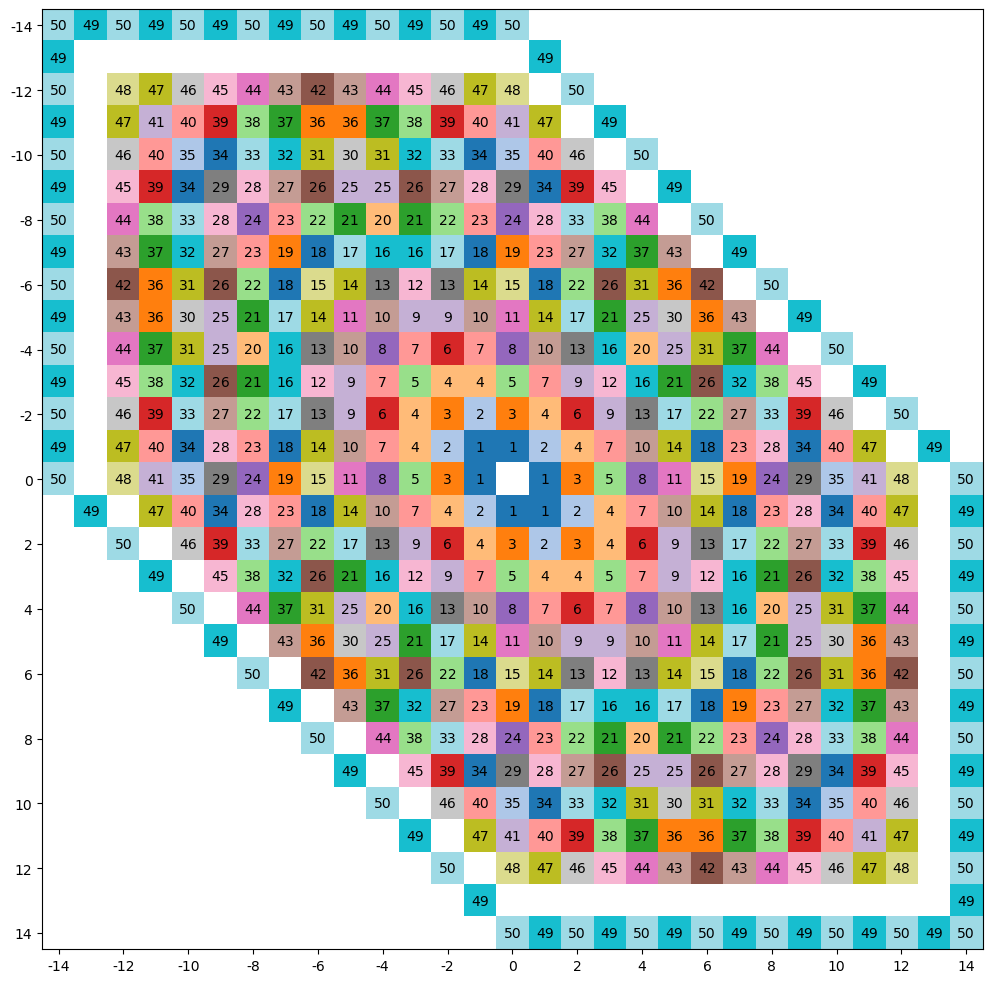

In [41]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(10, 10))

m = pd.DataFrame((theta_df != 0).any(axis=0).astype(int)).T

for i, c in enumerate(identical_groups[::-1]):
    m.loc[0, c] = i


# Get the tab10 colormap and repeat it
tab10 = cm.get_cmap("tab20", 20)
new_colors = tab10(np.arange(20))  # Get the colors from tab10
repeated_colors = np.tile(new_colors, (3, 1)).tolist()  # Repeat the colors 3 times
custom_cmap = ListedColormap(["white"] + repeated_colors)

ax.imshow(m.values[0].reshape((29, 29)), cmap=custom_cmap)
ax.set_xticks(range(0, 29, 2), range(-14, 15, 2))
ax.set_yticks(range(0, 29, 2), range(-14, 15, 2))

# Add text annotations (value in the center of each pixel)
for (j, i), label in np.ndenumerate(m.values[0].reshape((29, 29))):
    if label != 0:
        ax.text(i, j, label, ha="center", va="center")

plt.tight_layout()
plt.savefig("symmetries.pdf")

plt.show()